# Customer Churn Prediction 


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [19]:
df = pd.read_csv(r"C:\Users\Ayush Jindal\Desktop\customer_churn\Dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
552,2075-PUEPR,Male,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.35,1153.25,No
3020,5199-FPUSP,Male,0,No,Yes,33,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,No,Credit card (automatic),34.05,1113.95,No
4481,8644-XYTSV,Male,0,Yes,No,42,No,No phone service,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),40.15,1626.05,No
2841,9743-DQKQW,Male,0,No,No,3,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,25.10,79.8,No
1781,2519-LBNQL,Male,1,Yes,No,60,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.35,6339.45,No


### Data Exploration

We don't need the customerID so we can remove it.

In [20]:
df.drop('customerID', axis='columns', inplace=True)

In [21]:
#checking if the customerID column is dropped
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2046,Female,0,No,Yes,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.70,24.7,No
1376,Male,0,No,No,5,Yes,No,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Mailed check,70.00,347.4,Yes
4204,Male,1,No,No,5,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.55,408.5,No


In [22]:
#checking the data-type of the columns
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see from the data types that the TotalCharges is an object whereas MonthlyCharges is in float64  

In [26]:
#checking all the values in the dataframe
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

As, we can see these are all strings. We need to convert the strings to numbers.

In [24]:
#convert the TotalCharges data-type to numeric data-type
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

Since there were empty strings before, we might have some null figures.

In [25]:
#checking for null values
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

We cannot see the hidden rows.

In [27]:
#exploring the hidden rows
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [28]:
#shape of the dataframe
df.shape

(7043, 20)

As we can see there are 11 rows that have no values in the TotalCharges column.

In [29]:
#looking at the values of specific rows
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

We can drop 11 rows out of 7043 rows where the TotalCharges has no value.

In [30]:
#dropping those rows
df1= df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [31]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [32]:
#converting TotalCharges data-type from object to numeric
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

Since it is not showing an error, we can store it in the main dataframe.

In [33]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Ayush Jindal\AppData\Local\Temp\ipykernel_32956\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [34]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

As we can see, the datatype for TotalCharges is now float64.

### Data Visualization

We need to focus on tenure because tenure means how loyal the customer is.

We need to know how many of the loyal customers are leaving.

In [35]:
#finding all the customers where Churn=No
#Churn=No means the customer is not leaving
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [36]:
df1['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

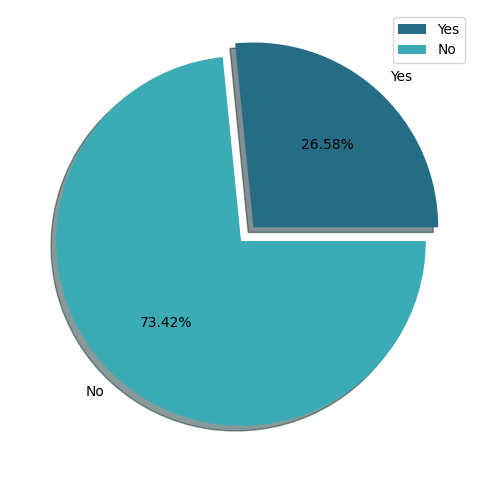

In [37]:
#to show the percentage of people quitting the services
plt.figure(figsize= (10, 6))
data_pie  = [1869 , 5163]
labels = ["Yes", "No"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

We clearly have a imbalanced dataset. Out of all the customers, 73.42% of people won't churn.

In [38]:
#tenure = for how many months are they availing the services
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [41]:
#tenure_churn_yes= the customers who availed the services but left
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
tenure_churn_yes

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

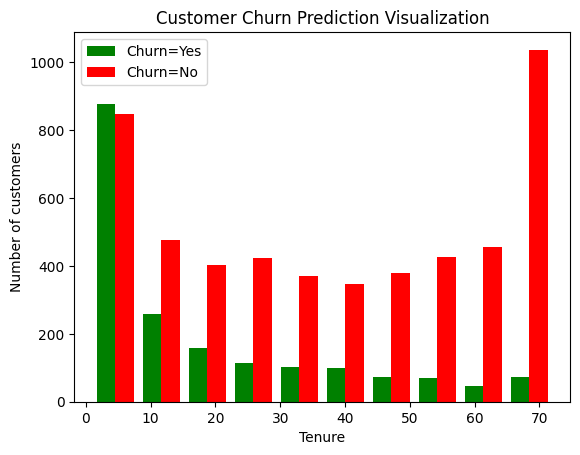

In [42]:
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

#giving the axis labels
plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction Visualization")

In [43]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

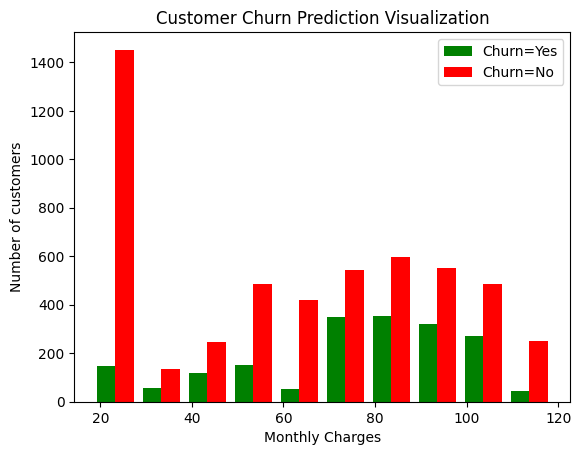

In [44]:
plt.hist([mc_churn_yes, mc_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

#giving the axis labels
plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction Visualization")

As we can see the customers are leaving more.

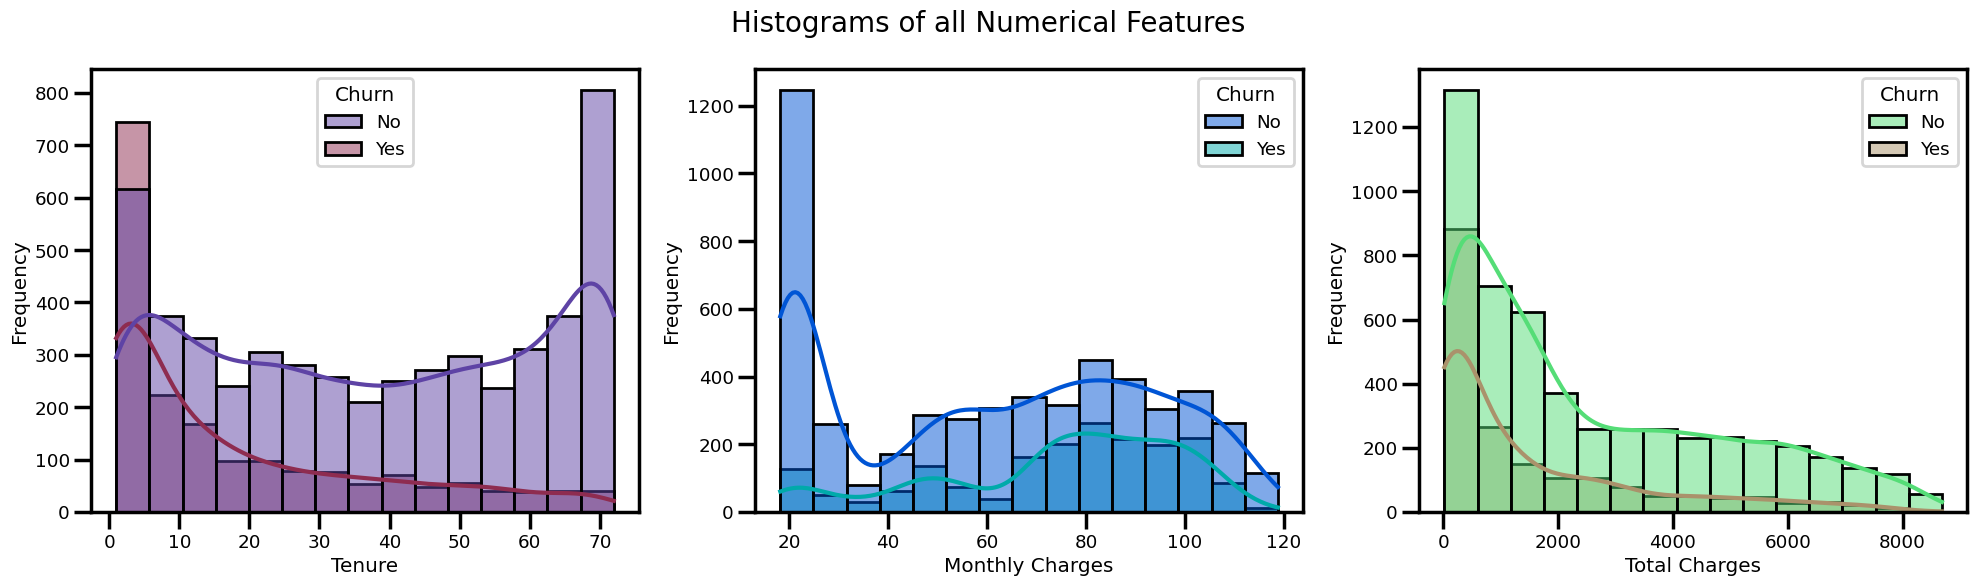

In [45]:
import seaborn as sns
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

ax1 = sns.histplot(x = df1['tenure'],color= 'teal', hue= df1['Churn'], ax= ax[0], bins= 15, kde= True, palette= 'twilight')
ax1.set(xlabel= 'Tenure', ylabel= 'Frequency')

ax2 = sns.histplot(x = df1['MonthlyCharges'], color= 'teal', hue= df1['Churn'], ax= ax[1], bins= 15, kde= True, palette= 'winter')
ax2.set(xlabel= 'Monthly Charges', ylabel= 'Frequency')

ax3 = sns.histplot(x = df1['TotalCharges'], color= 'teal', hue= df1['Churn'], ax= ax[2], bins= 15, kde= True, palette= 'terrain')
ax3.set(xlabel= 'Total Charges', ylabel= 'Frequency')

plt.tight_layout()
plt.show()

The more months the customer stays with the company, the less likely it is that he/she will churn. Also, the total charges column is clearly skewed.

<Axes: >

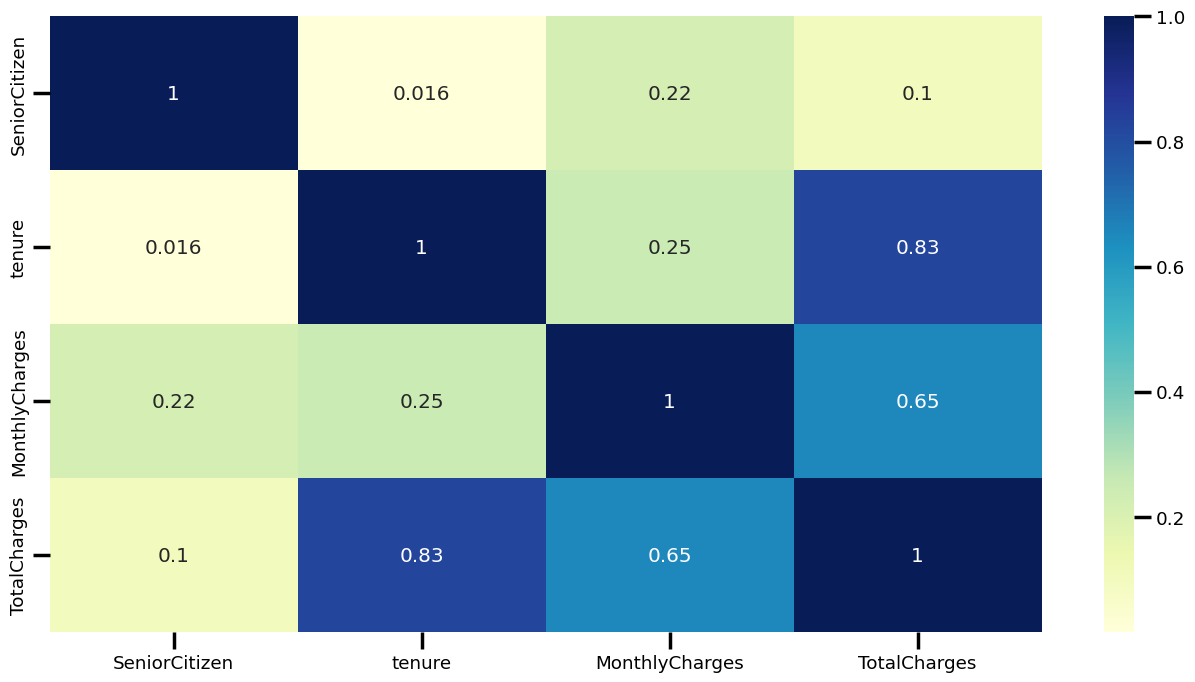

In [49]:
#correlation between the features
plt.figure(figsize=(16, 8))  # Adjust size to be more readable
sns.heatmap(df1.select_dtypes(include=['number']).corr(), cmap='YlGnBu', annot=True)


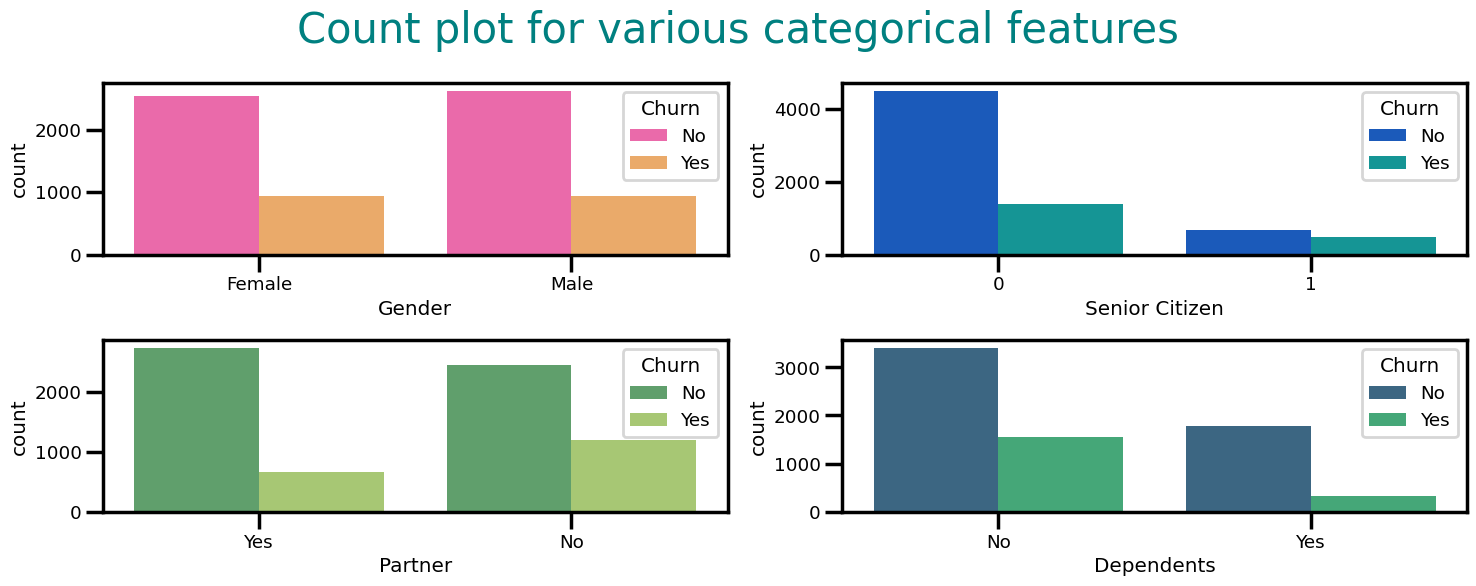

In [50]:
fig, ax = plt.subplots(2, 2, figsize = (15, 6))
plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='gender', data= df1, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Gender')

ax2 = sns.countplot(x ='SeniorCitizen', data= df1, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Senior Citizen')

ax3 = sns.countplot(x ='Partner', data= df1, hue= 'Churn', ax= ax[1, 0], palette= 'summer')
ax3.set(xlabel = 'Partner')

ax4 = sns.countplot(x ='Dependents', data= df1, hue= 'Churn', ax= ax[1, 1], palette= 'viridis')
ax4.set(xlabel = 'Dependents')

plt.tight_layout()
plt.show()

Based on the demographic information, it is clear that Senior Citizens are much more likely to churn, also, customers not having a partner have higher chances of churning as compared to customers who do have a partner.

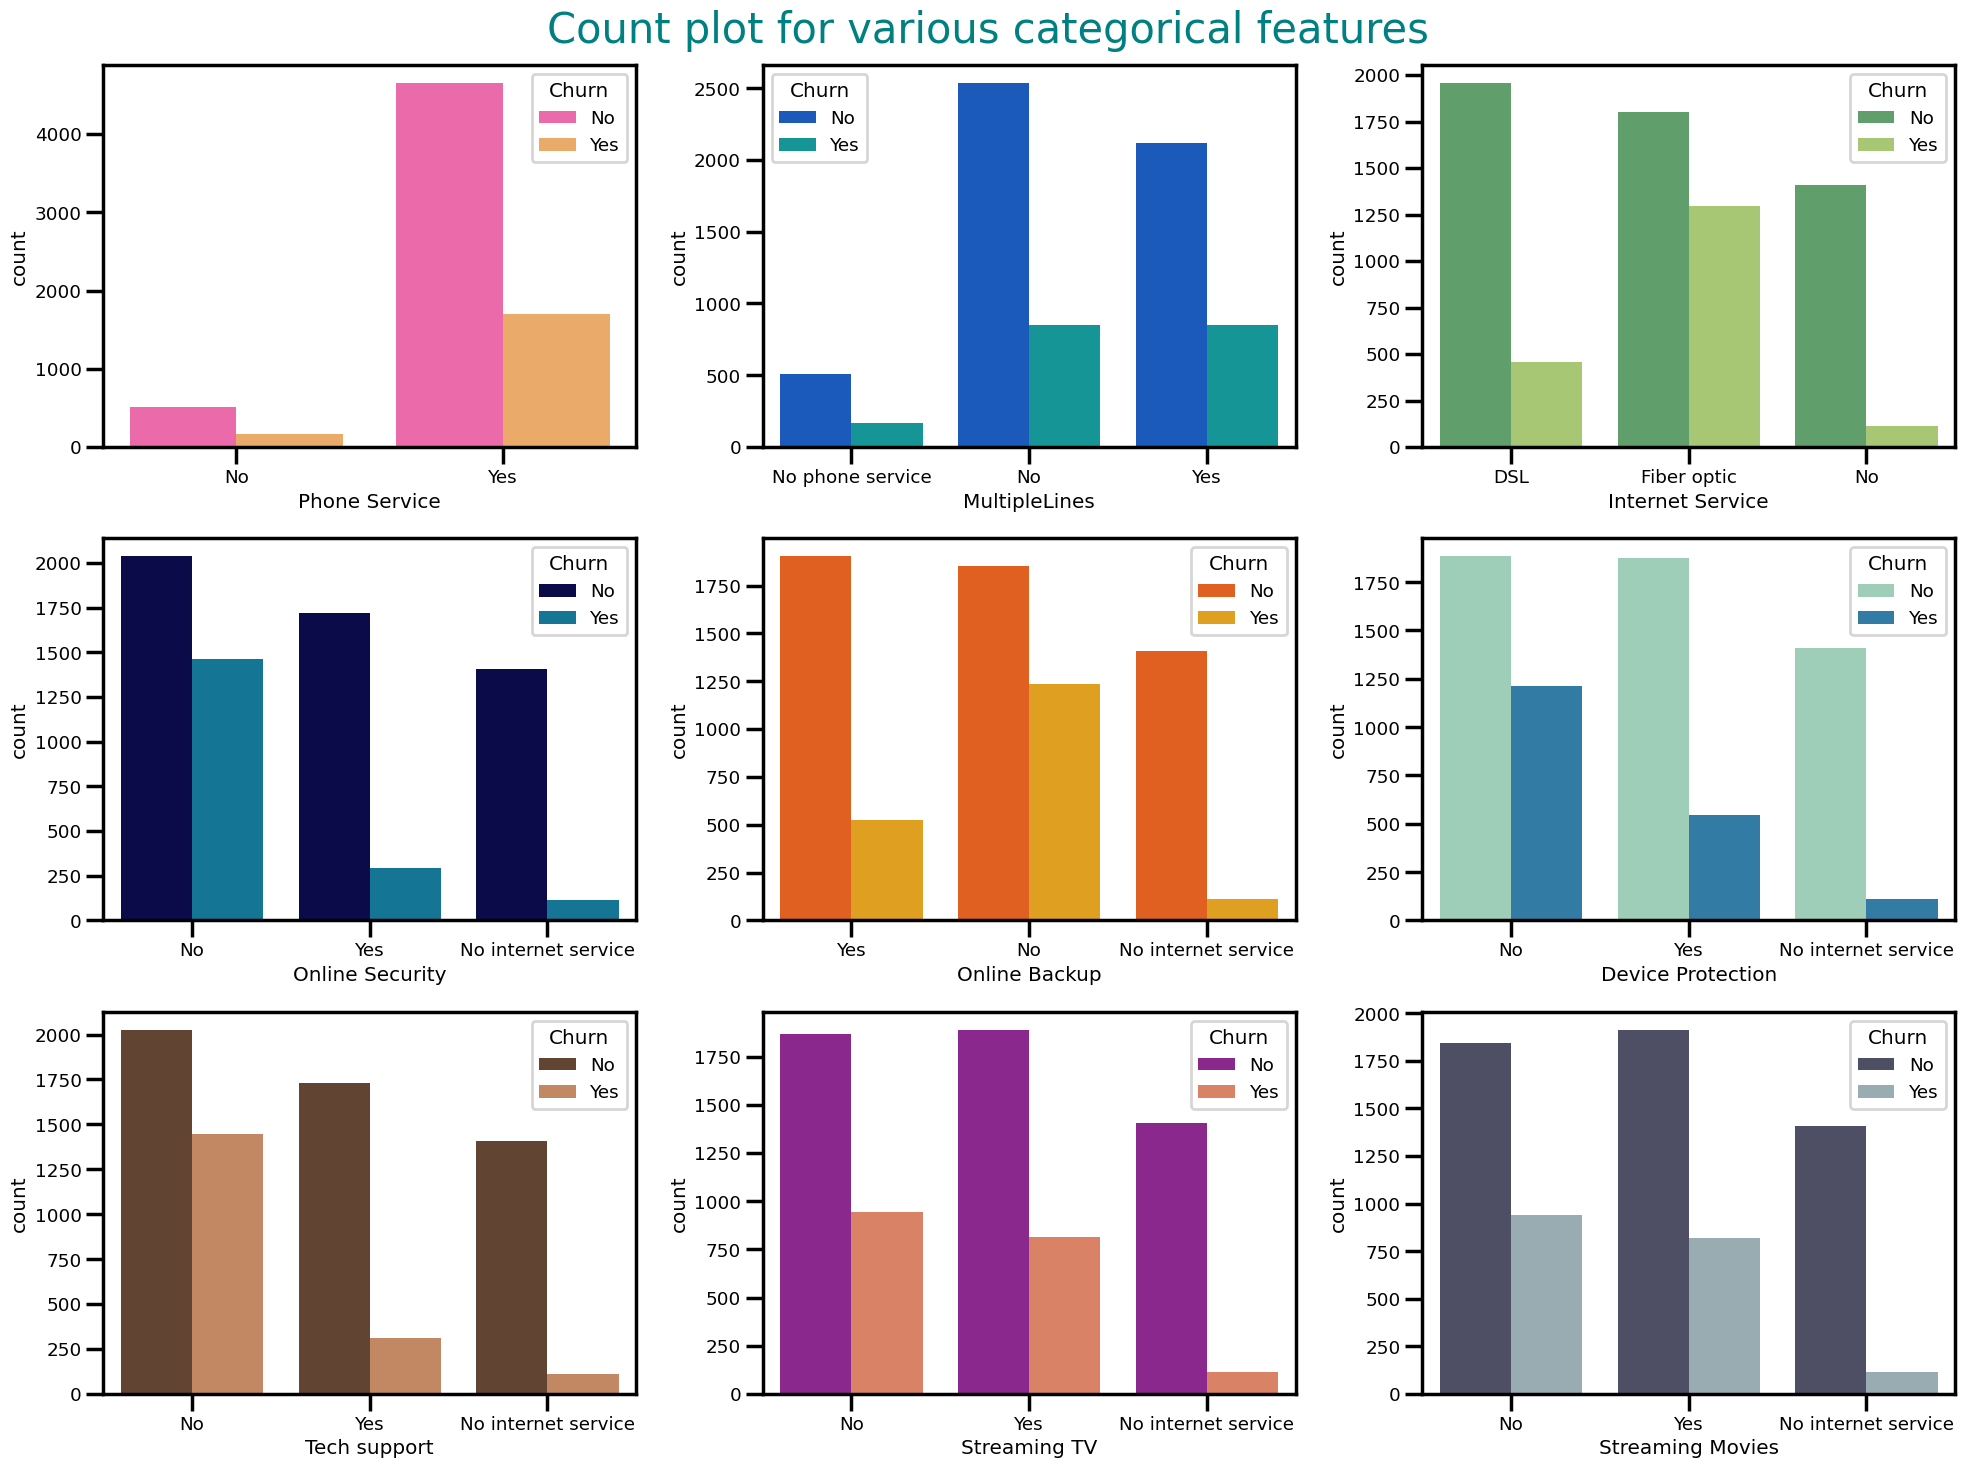

In [51]:
fig, ax = plt.subplots(3, 3, figsize = (20, 15))

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='PhoneService', data= df1, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Phone Service')

ax2 = sns.countplot(x ='MultipleLines', data= df1, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'MultipleLines')

ax3 = sns.countplot(x ='InternetService', data= df1, hue= 'Churn', ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Internet Service')

ax4 = sns.countplot(x ='OnlineSecurity', data= df1, hue= 'Churn', ax= ax[1, 0], palette= 'ocean')
ax4.set(xlabel = 'Online Security')

ax5 = sns.countplot(x ='OnlineBackup', data= df1, hue= 'Churn', ax= ax[1, 1], palette= 'autumn')
ax5.set(xlabel = 'Online Backup')

ax6 = sns.countplot(x ='DeviceProtection', data= df1, hue= 'Churn', ax= ax[1, 2], palette= 'YlGnBu')
ax6.set(xlabel = 'Device Protection')

ax7 = sns.countplot(x ='TechSupport', data= df1, hue= 'Churn', ax= ax[2, 0], palette= 'copper')
ax7.set(xlabel = 'Tech support')

ax8 = sns.countplot(x ='StreamingTV', data= df1, hue= 'Churn', ax= ax[2, 1], palette= 'plasma')
ax8.set(xlabel = 'Streaming TV')

ax9 = sns.countplot(x ='StreamingMovies', data= df1, hue= 'Churn', ax= ax[2, 2], palette= 'bone')
ax9.set(xlabel = 'Streaming Movies')

plt.tight_layout()
plt.show()

Customers having Fiber optic internet service are much more likely to churn then customers who don't.

### Label Encoding

In [52]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


As we can see, lot of columns have yes/no value so we need to do label encoding.

In [53]:
for column in df:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [54]:
#printing unique values in each of the column
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 


In [55]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Some of the columns have no internet service or no phone service which can be replaced by a simple no.

In [56]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Ayush Jindal\AppData\Local\Temp\ipykernel_32956\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Ayush Jindal\AppData\Local\Temp\ipykernel_32956\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [57]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Performing one hot encoding to convert the yes/no to 1/0

In [58]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\Ayush Jindal\AppData\Local\Temp\ipykernel_32956\1648037665.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
C:\Users\Ayush Jindal\AppData\Local\Temp\ipykernel_32956\1648037665.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].r

In [59]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [60]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\Ayush Jindal\AppData\Local\Temp\ipykernel_32956\698335744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
C:\Users\Ayush Jindal\AppData\Local\Temp\ipykernel_32956\698335744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[

In [61]:
df1.gender.unique()

array([1, 0])

In [62]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [63]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
800,1,1,1,0,70,1,1,0,0,0,...,False,True,False,False,False,True,False,True,False,False
5111,0,1,0,0,47,1,0,1,0,0,...,False,True,False,True,False,False,False,False,False,True
6898,0,0,1,1,22,1,0,0,1,1,...,False,True,False,False,True,False,False,False,False,True
4391,1,0,0,0,9,1,0,0,0,0,...,True,False,False,True,False,False,True,False,False,False
2409,0,0,1,1,28,0,0,0,1,1,...,True,False,False,False,True,False,False,True,False,False


In [64]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

As we can see, we have converted the categorical data to numeric data.

### Minmax Scaling

In [65]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [66]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [67]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,0.464789,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,0.014085,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,0.619718,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,0.014085,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,1,0,1,1,1.000000,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,1,0,1,1,0.140845,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,0.042254,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [68]:
df2.to_csv('modified.csv', index=False)

### Train-Test Split

In [69]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [70]:
X_train.shape

(5625, 26)

In [71]:
X_test.shape

(1407, 26)

In [72]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
101,1,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
2621,0,0,1,0,0.985915,1,0,0,1,1,...,True,False,False,False,False,True,False,True,False,False
392,1,1,0,0,0.014085,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1327,0,0,1,0,0.816901,1,1,0,0,1,...,False,True,False,False,True,False,True,False,False,False
3607,1,0,0,0,0.169014,1,0,1,0,0,...,True,False,False,False,True,False,False,False,False,True
2773,0,0,1,0,0.323944,0,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False
1936,1,0,1,0,0.704225,1,0,1,1,0,...,True,False,False,False,True,False,True,False,False,False
5387,0,0,0,0,0.042254,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
4331,0,0,0,0,0.985915,1,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False


In [73]:
len(X_train.columns)

26

### Building an ANN model 

In [74]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200)

Epoch 1/200


C:\Users\Ayush Jindal\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7463 - loss: 0.5301  
Epoch 2/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.8000 - loss: 0.4122
Epoch 3/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.8054 - loss: 0.4125
Epoch 4/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.8040 - loss: 0.4117
Epoch 5/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.7921 - loss: 0.4298
Epoch 6/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.8205 - loss: 0.3911
Epoch 7/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.8102 - loss: 0.4088
Epoch 8/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.8147 - loss: 0.4079
Epoch 9/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.8128 - loss: 0.4026
Epoch 10/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.8156 - loss: 0.3972
Epoch 11/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8181 - loss: 0.3988
Epoch 12/200
176/176 ━━━━━━━━━━

In [75]:
#printing the accuracy of the model
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.7716 - loss: 0.5366


[0.5472896695137024, 0.7576403617858887]

In [76]:
# Convert the sigmoid predictions to 0 or 1
prediction = model.predict(X_test)
y_pred = []
for element in prediction:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [77]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step


array([[2.9345855e-01],
       [3.5653487e-01],
       [3.1317098e-04],
       [6.5136468e-01],
       [2.9547733e-01]], dtype=float32)

In [78]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [101]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [79]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       999
           1       0.61      0.47      0.53       408

    accuracy                           0.76      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.74      0.76      0.75      1407



Text(79.91666666666667, 0.5, 'Truth')

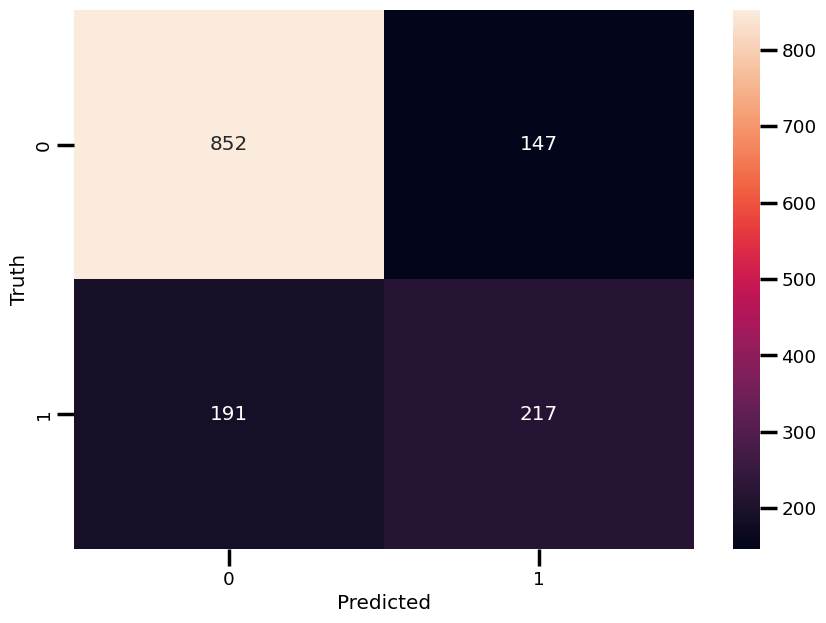

In [61]:
#confusion matrix score
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [102]:
y_test.shape

(1407,)

In [83]:
round((862+229)/(862+229+137+179),2)

0.78

### Generating the pickle files

In [80]:
import pickle
     
# Save the trained model
filename = 'trained.sav'
pickle.dump(model, open(filename, 'wb'))

In [81]:
# Load the saved model
loaded_model = pickle.load(open('trained.sav', 'rb'))

In [82]:
def generate_churn_labels(predictions):
    churn_labels = []
    for prediction in predictions:
        if prediction >= 0.5:
            churn_labels.append(1)  # Churn
        else:
            churn_labels.append(0)  # Not Churn
    return churn_labels

In [83]:
# Assuming 'model' is your trained model and 'X_test' is the test data
predictions = model.predict(X_test)

# Generate churn labels based on the predictions
churn_labels = generate_churn_labels(predictions)

# Print the churn labels
print(churn_labels)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0

In [85]:
import pickle
import numpy as np

# Function to load the pickled model
def load_model():
    with open('trainedModel.sav', 'rb') as file:
        model = pickle.load(file)
    return model

# Function to predict churn using the loaded model
def predict_churn(gender, senior_citizen, partner, dependents, tenure, phone_service, multiple_lines,
                  online_security, online_backup, device_protection, tech_support, streaming_tv,
                  streaming_movies, paperless_billing, monthly_charges, total_charges, internet_service_dsl,
                  internet_service_fiber_optic, internet_service_no, contract_month_to_month,
                  contract_one_year, contract_two_year, payment_method_bank_transfer,
                  payment_method_credit_card, payment_method_electronic_check, payment_method_mailed_check):
    
    # Creating the feature vector
    features = np.array([gender, senior_citizen, partner, dependents, tenure, phone_service, multiple_lines,
                         online_security, online_backup, device_protection, tech_support, streaming_tv,
                         streaming_movies, paperless_billing, monthly_charges, total_charges, internet_service_dsl,
                         internet_service_fiber_optic, internet_service_no, contract_month_to_month,
                         contract_one_year, contract_two_year, payment_method_bank_transfer,
                         payment_method_credit_card, payment_method_electronic_check, payment_method_mailed_check]).reshape(1, -1)
    
    # Loading the pickled model
    model = load_model()
    
    # Predicting churn
    churn_prediction = model.predict(features)
    
    # Printing the churn prediction
    if churn_prediction[0] == 1:
        print("Customer will leave")
    else:
        print("Customer will not leave")


In [86]:
import pickle

# Assuming your trained model is stored in the 'model' variable
with open('trainedModel.sav', 'wb') as file:
    pickle.dump(model, file)

In [87]:
predict_churn(1, 0, 1, 0, 0.0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0.11542288557213931, 0.001275098084468036, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Customer will not leave
